# Provided datasets


## Forecasting

Forecasting data are stored in csv files with a header for column names. Six standard example datasets are shipped by default. These are stored in csv format
in time, value format, including a header. For example,

    Date,Passengers
    1949-01,112
    1949-02,118

    "Obs","TOTEMP","GNPDEFL","GNP","UNEMP","ARMED","POP","YEAR"
    1,60323,83,234289,2356,1590,107608,1947
    2,61122,88.5,259426,2325,1456,108632,1948
    3,60171,88.2,258054,3682,1616,109773,1949

    ,Quarter,Consumption,Income,Production,Savings,Unemployment
    0,1970 Q1,0.615986218,0.9722610429999999,-2.4527003119999997,4.810311502,0.9
    1,1970 Q2,0.46037569,1.169084717,-0.551525087,7.287992337,0.5
    2,1970 Q3,0.876791423,1.55327055,-0.35870786200000004,7.289013063,0.5

The problem specific loading functions return the series as either a `pd.Series` or a
 `pd.DataFrame`. There are currently six forecasting problems shipped.

### Airline

The classic Box & Jenkins airline data. Monthly totals of international
    airline passengers, 1949 to 1960. This data shows an increasing trend,
    non-constant (increasing) variance and periodic, seasonal patterns. The


(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

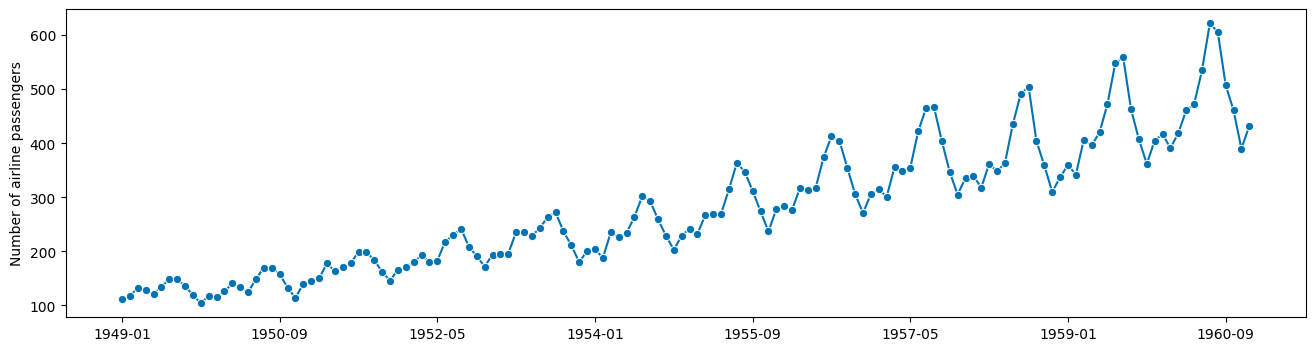

In [1]:
import warnings

from aeon.datasets import load_airline
from aeon.utils.plotting import plot_series

warnings.filterwarnings("ignore")

airline = load_airline()
plot_series(airline)

### Longley
This mulitvariate time series dataset contains various US macroeconomic
    variables from 1947 to 1962 that are known to be highly collinear. This loader
    returns the series to be forecast (default TOTEMP: total employment) and other
    variables that may be useful in  the forecast
    GNPDEFL - Gross national product deflator
    GNP - Gross national product
    UNEMP - Number of unemployed
    ARMED - Size of armed forces
    POP - Population


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='TOTEMP'>)

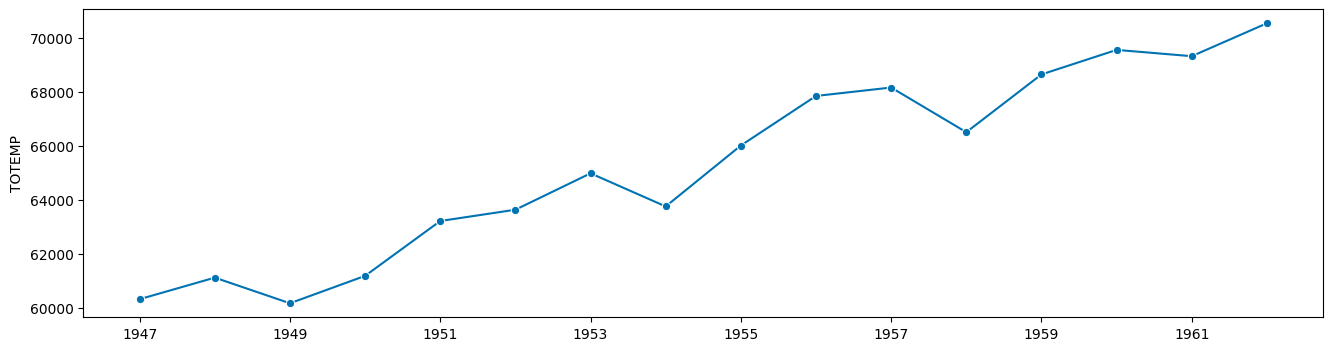

In [2]:
from aeon.datasets import load_longley

employment, longley = load_longley()
plot_series(employment)

### Lynx

The annual numbers of lynx trappings for 1821–1934 in Canada. This
    time-series records the number of skins of predators (lynx) that were collected
    over several years by the Hudson's Bay Company. Returns a pd.Series

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of Lynx trappings'>)

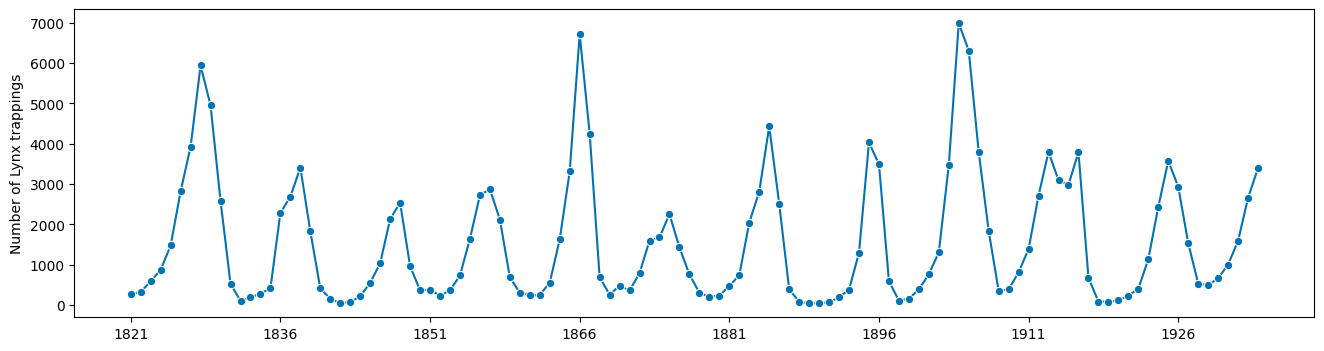

In [3]:
from aeon.datasets import load_lynx

lynx = load_lynx()
plot_series(lynx)

### PBS_dataset

The Pharmaceutical Benefits Scheme (PBS) is the Australian government drugs
    subsidy scheme. Data comprises of the numbers of scripts sold each month for immune sera
    and immunoglobulin products in Australia. The load function returns a pd.Series.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of scripts'>)

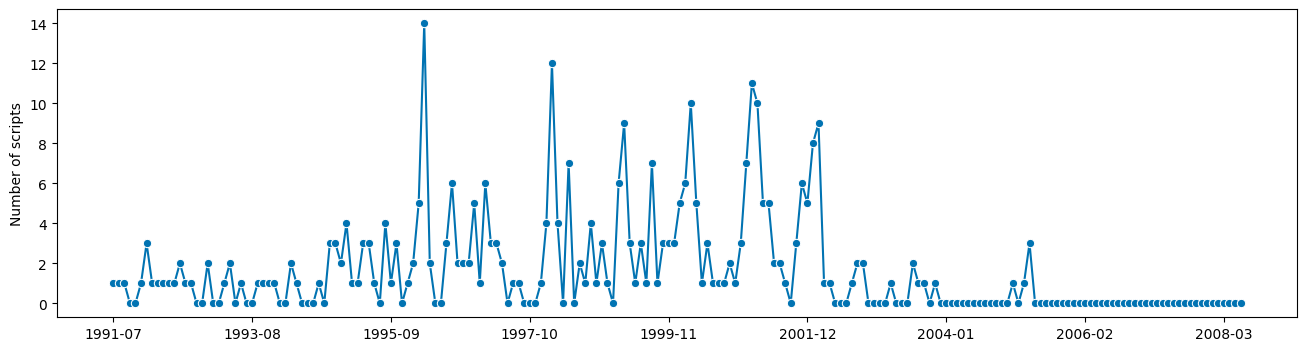

In [4]:
from aeon.datasets import load_PBS_dataset

pbs = load_PBS_dataset()
plot_series(pbs)

### ShampooSales



Uschange

## Machine Learning

### Provided datasets


<a id="ts_files"></a>
### The .ts file format
One common use case is to load locally stored data. To make this easy, the `.ts` file format has been created for representing problems in a standard format for use with aeon.

### Representing data with .ts files
A .ts file include two main parts:
* header information
* data

The header information is used to facilitate simple representation of the data through including metadata about the structure of the problem. The header contains the following:

    @problemName <problem name>
    @timeStamps <true/false>
    @univariate <true/false>
    @classLabel <true/false> <space delimited list of possible class values>
    @data

The data for the problem should begin after the @data tag. In the simplest case where @timestamps is false, values for a series are expressed in a comma-separated list and the index of each value is relative to its position in the list (0, 1, ..., m). An _instance_ may contain 1 to many dimensions, where instances are line-delimited and dimensions within an instance are colon (:) delimited. For example:

    2,3,2,4:4,3,2,2
    13,12,32,12:22,23,12,32
    4,4,5,4:3,2,3,2

This example data has 3 _instances_, corresponding to the three lines shown above. Each instance has 2 _dimensions_ with 4 observations per dimension. For example, the intitial instance's first dimension has the timepoint values of 2, 3, 2, 4 and the second dimension has the values 4, 3, 2, 2.

Missing readings can be specified using ?. For example,

    2,?,2,4:4,3,2,2
    13,12,32,12:22,23,12,32
    4,4,5,4:3,2,3,2

would indicate the second timepoint value of the initial instance's first dimension is missing.

Alternatively, for sparse datasets, readings can be specified by setting @timestamps to true in the header and representing the data with tuples in the form of (timestamp, value) just for the obser. For example, the first instance in the example above could be specified in this representation as:

    (0,2),(1,3)(2,2)(3,4):(0,4),(1,3),(2,2),(3,2)

Equivalently, the sparser example

    2,5,?,?,?,?,?,5,?,?,?,?,4

could be represented with just the non-missing timestamps as:

    (0,2),(1,5),(7,5),(12,4)

When using the .ts file format to store data for timeseries classification problems, the class label for an instance should be specified in the last dimension and @classLabel should be set to true in the header information and be followed by the set of possible class values. For example, if a case consists of a single dimension and has a class value of 1 it would be specified as:

     1,4,23,34:1


### Loading from .ts file to numpy arrays

A dataset can be loaded from a .ts file using the following method in aeon.datasets:

    load_from_tsfile(full_file_path_and_name, replace_missing_vals_with='NaN')

This can be demonstrated using the Arrow Head problem that is included in aeon under aeon/datasets/data

In [5]:
import os

import aeon
from aeon.datasets import load_from_tsfile

DATA_PATH = os.path.join(os.path.dirname(aeon.__file__), "datasets/data")

train_x, train_y = load_from_tsfile(
    os.path.join(DATA_PATH, "ArrowHead/ArrowHead_TRAIN.ts")
)
test_x, test_y = load_from_tsfile(
    os.path.join(DATA_PATH, "ArrowHead/ArrowHead_TEST.ts")
)

Train and test partitions of the ArrowHead problem have been loaded into 3D numpy
arrays with an associated array of class values. As an example, below is the first
instance train_x and first five class values from train_y:

In [6]:
train_x[0]

array([[-1.9630089 , -1.9578249 , -1.9561449 , -1.9382889 , -1.8966569 ,
        -1.8698569 , -1.8387049 , -1.8122888 , -1.7364328 , -1.6733288 ,
        -1.6230727 , -1.5858727 , -1.5438407 , -1.4567846 , -1.3787206 ,
        -1.2924965 , -1.2169605 , -1.1089764 , -0.96868834, -0.83160026,
        -0.76030422, -0.59963213, -0.46625605, -0.30638396, -0.22684791,
        -0.08975983,  0.04137625,  0.23203876,  0.38728525,  0.41471247,
         0.51567412,  0.62614779,  0.72741025,  0.75345186,  0.78001988,
         0.83840391,  0.88817034,  0.91981996,  0.93344237,  0.9834616 ,
         1.04958   ,  1.1308921 ,  1.1898697 ,  1.2635882 ,  1.2976586 ,
         1.4139322 ,  1.4014314 ,  1.4443339 ,  1.4868475 ,  1.4448603 ,
         1.4448603 ,  1.4635131 ,  1.4635131 ,  1.4424827 ,  1.4822811 ,
         1.5221659 ,  1.5411515 ,  1.5181995 ,  1.4952875 ,  1.4739563 ,
         1.4479355 ,  1.3584794 ,  1.2685802 ,  1.2195033 ,  1.1558585 ,
         1.0848617 ,  0.97762959,  0.94645038,  0.9

In [7]:
train_y[0:5]

array(['0', '1', '2', '0', '1'], dtype='<U1')

In [8]:
train_x

array([[[-1.9630089, -1.9578249, -1.9561449, ..., -1.9053929,
         -1.9239049, -1.9091529]],

       [[-1.7745713, -1.7740359, -1.7765863, ..., -1.7292269,
         -1.7756704, -1.7893245]],

       [[-1.8660211, -1.8419912, -1.8350253, ..., -1.8625124,
         -1.8633682, -1.8464925]],

       ...,

       [[-2.1308119, -2.1044297, -2.0747549, ..., -2.0340977,
         -2.0800313, -2.103448 ]],

       [[-1.8803376, -1.8626622, -1.8496866, ..., -1.8485336,
         -1.8640342, -1.8798851]],

       [[-1.80105  , -1.7989155, -1.7783754, ..., -1.7965491,
         -1.7985443, -1.80105  ]]])

<a id="other_file_types"></a>
## Loading other file formats
Researchers who have made timeseries data available have used two other common formats, including:

+ Weka ARFF files
+ UCR .tsv files


### Loading from Weka ARFF files

It is also possible to load data from Weka's attribute-relation file format (ARFF) files. Data for timeseries problems are made available in this format by researchers at the University of East Anglia (among others) at www.timeseriesclassification.com. The `load_from_arff_file` method in `aeon.datasets` supports reading data for both univariate and multivariate timeseries problems.

The univariate functionality is demonstrated below using data on the ArrowHead problem again (this time loading from ARFF file).

In [9]:
from aeon.datasets import load_from_arff_file

X, y = load_from_arff_file(DATA_PATH + "/ArrowHead/ArrowHead_TRAIN.arff")
X[0][0][:5]

array([-1.9630089, -1.9578249, -1.9561449, -1.9382889, -1.8966569])

### Loading from UCR .tsv Format Files

A further option is to load data into aeon from tab separated value (.tsv) files. Researchers at the University of Riverside, California make a variety of timeseries data available in this format at https://www.cs.ucr.edu/~eamonn/time_series_data_2018.

The `load_from_tsv_file` method in `aeon.datasets` supports reading
univariate problems. An example with ArrowHead is given below to demonstrate equivalence with loading from the .ts and ARFF file formats.

In [10]:
from aeon.datasets import load_from_tsv_file

X, y = load_from_tsv_file(DATA_PATH + "/ArrowHead/ArrowHead_TRAIN.tsv")
X[0][0][:5]

array([-1.9630089, -1.9578249, -1.9561449, -1.9382889, -1.8966569])